# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

import pandas as pd

## imports for Python, Pandas

import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

type(data)

# use normalization to create tables from nested element
json_normalize(data, 'counties')

# further populate tables created from nested element
json_norm = json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])
json_norm.head()

type(json_norm)

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

# load json as string
json.load((open('data/world_bank_projects_less.json')))

# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read data to pd frame
WBP = pd.read_json('data/world_bank_projects.json')
print(WBP.shape)
print(WBP.columns)

(500, 50)
Index([u'_id', u'approvalfy', u'board_approval_month', u'boardapprovaldate',
       u'borrower', u'closingdate', u'country_namecode', u'countrycode',
       u'countryname', u'countryshortname', u'docty',
       u'envassesmentcategorycode', u'grantamt', u'ibrdcommamt', u'id',
       u'idacommamt', u'impagency', u'lendinginstr', u'lendinginstrtype',
       u'lendprojectcost', u'majorsector_percent', u'mjsector_namecode',
       u'mjtheme', u'mjtheme_namecode', u'mjthemecode', u'prodline',
       u'prodlinetext', u'productlinetype', u'project_abstract',
       u'project_name', u'projectdocs', u'projectfinancialtype',
       u'projectstatusdisplay', u'regionname', u'sector', u'sector1',
       u'sector2', u'sector3', u'sector4', u'sector_namecode', u'sectorcode',
       u'source', u'status', u'supplementprojectflg', u'theme1',
       u'theme_namecode', u'themecode', u'totalamt', u'totalcommamt', u'url'],
      dtype='object')


# 1. Find the 10 countries with most projects

In [3]:
# count projects for each country and sort
P_count = WBP.countryname.value_counts()

# print 10 countries have most projects
print(P_count.head(10))

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


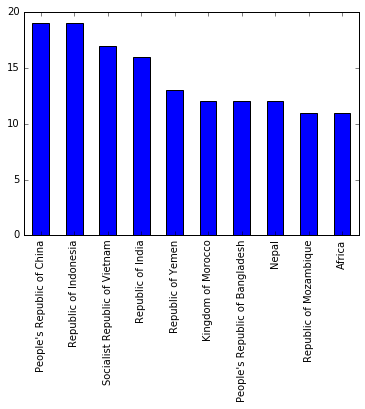

In [4]:
# make the bar plot for those 10 countries
P_count.head(10).plot(kind='bar') 

# 2. Find the top 10 major project themes,using column 'mjtheme_namecode'

In [5]:
# load file using json
WBP_json = json.load(open('data/world_bank_projects.json'))
type(WBP_json)

list

In [6]:
# select data using 'mjtheme_namecode'
Ptheme = json_normalize(WBP_json, 'mjtheme_namecode')
Ptheme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [7]:
# fill the empty cell with NA
Ptheme.replace('', np.nan, inplace=True)
Ptheme.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64


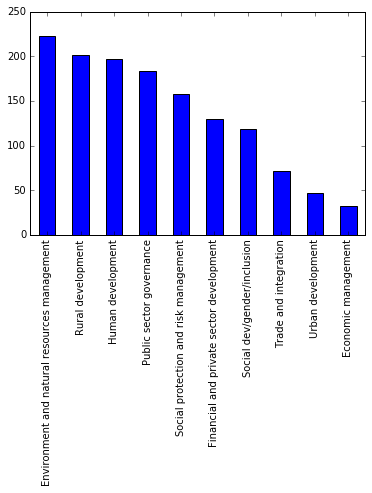

In [8]:
# select 10 major projects
Ptheme_counts = Ptheme['name'].value_counts()
print(Ptheme_counts.head(10))

# make the bar plot
Ptheme_counts.head(10).plot(kind='bar')

# 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [9]:
# build table that link code to theme name
code_name = Ptheme.drop_duplicates().dropna().sort_values('code')
code_name.set_index('code')
print(code_name)

    code                                          name
2      1                           Economic management
18    10                             Rural development
6     11  Environment and natural resources management
5      2                      Public sector governance
252    3                                   Rule of law
11     4      Financial and private sector development
4      5                         Trade and integration
3      6         Social protection and risk management
8      7                   Social dev/gender/inclusion
0      8                             Human development
53     9                             Urban development


In [10]:
# create a copy of the data frame Ptheme
P1=Ptheme.copy()
print(P1.shape)
P1.head()

(1499, 2)


,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [12]:
# replace NaN according to the code in code_name df
P1['name'] = P1['name'].where(P1['name'].notnull(), 
                                      P1['code'].map(code_name.set_index('code')['name'])) 
print(P1.shape)
P1.head()

(1499, 2)


,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [16]:
# create a copy of the data frame
P2 = Ptheme.copy()
P2.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [20]:
# Method 2, set index to code
P2 = P2.set_index("code").name.fillna(code_name.set_index("code").name).reset_index()
print(P2.shape)
P2.head()

(1499, 2)


,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
